# Importing necessary packages

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Generating data 


## Function to be fitted

In [13]:
def function(x):
  y = np.sin(x)
  return y
vf = np.vectorize(function)

Plot the function

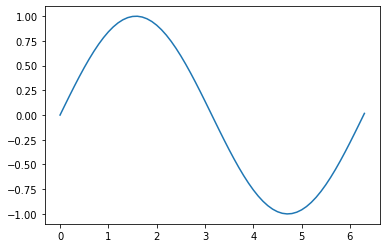

In [15]:
init = 0
endval = 2*np.pi
step = .1
x = np.arange(init,endval+step,step)
plt.plot(x,vf(x))